In [1]:
suppressMessages(library(ArchR))
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)
suppressMessages(library(Seurat))
suppressMessages(library(SingleCellExperiment))

In [2]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 12)

##################################
### load rheMac10 ArchR genome ###
GENOMEDIR='/home/bnphan/resources/genomes/rheMac10'
load(file.path(GENOMEDIR,'rheMac10_liftoff_GRCh38.p13_ArchR_annotations.rda'))

Input threads is equal to or greater than ncores minus 1 (7)
Setting cores to ncores minus 2. Set force = TRUE to set above this number!

Setting default number of Parallel threads to 6.



In [3]:
PROJDIR='../../../data/tidy_data/ArchRProjects'
ARCHDIR=file.path(PROJDIR,'ArchR_multiomeATAC_DLPFC_glia')
proj = loadArchRProject(ARCHDIR)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [4]:
proj <- addImputeWeights(proj, reducedDims = "HarmonyX30")

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-6add61aed067-Date-2021-09-22_Time-18-11-02.log
If there is an issue, please report to github with logFile!

2021-09-22 18:11:03 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



# Integrate with snRNA-seq from glial cell types

In [6]:
SETDIR='../../../data/tidy_data/rdas/JH_PFC_LabeledNuclei_20210827'
rna_sce = readRDS(file.path(SETDIR,'glia_final.sce.rds'))

In [7]:
head(colData(rna_sce))
logcounts(rna_sce) = NULL

DataFrame with 6 rows and 13 columns
                           batch   cell_id     sample_names   monkey   n_genes
                     <character> <integer>         <factor> <factor> <integer>
AAACCCACATGGATCT-1-0           0         3 Monkey_O_sample1 Monkey_O      2648
AAACGAAGTGTATTGC-1-0           0        14 Monkey_O_sample1 Monkey_O      1943
AAACGAATCCACGTCT-1-0           0        18 Monkey_O_sample1 Monkey_O      1921
AAACGCTAGGAAAGTG-1-0           0        22 Monkey_O_sample1 Monkey_O      2488
AAACGCTCAGCGACAA-1-0           0        27 Monkey_O_sample1 Monkey_O      1915
AAACGCTGTATCCTTT-1-0           0        29 Monkey_O_sample1 Monkey_O      3180
                     percent.mt       nCount_RNA         percent_ribo
                      <numeric>        <numeric>            <numeric>
AAACCCACATGGATCT-1-0          0 5070.97835415043  0.00317026604898274
AAACGAAGTGTATTGC-1-0          0  3118.2357296627  0.00191451911814511
AAACGAATCCACGTCT-1-0          0 3037.93939913064  0

In [8]:
###############################################################
# split the cells in snATAC and snRNA by biological replicates
groupList <- SimpleList(
  Monkey1 = SimpleList(
    ATAC = proj$cellNames[proj$Animal %in% c('Monkey_L')],
    RNA = colnames(rna_sce)[colData(rna_sce)$monkey == c('Monkey_O')]
  ),
  Monkey2 = SimpleList(
    ATAC = proj$cellNames[proj$Animal == 'Monkey_M'],
    RNA = colnames(rna_sce)[colData(rna_sce)$monkey == 'Monkey_S']
  )
)

In [9]:
#####################################
# integration split by tissue region
proj <- addGeneIntegrationMatrix(
    ArchRProj = proj,
    useMatrix = "GeneScoreMatrix",
    matrixName = "GeneIntegrationMatrix",
    reducedDims = "HarmonyX30",
    seRNA = rna_sce,  nGenes = 2000, 
    addToArrow = FALSE, plotUMAP = FALSE,
    groupList = groupList,
    groupRNA = "cell_class",
    nameCell = "predictedCell_RNA2ATACCo",
    nameGroup = "predictedGroup_RNA2ATACCo",
    nameScore = "predictedScore_RNA2ATACCo"
)

ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-6add1262a988-Date-2021-09-22_Time-18-12-27.log
If there is an issue, please report to github with logFile!

2021-09-22 18:12:28 : Running Seurat's Integration Stuart* et al 2019, 0.022 mins elapsed.

2021-09-22 18:12:30 : Checking ATAC Input, 0.054 mins elapsed.

2021-09-22 18:12:30 : Checking RNA Input, 0.063 mins elapsed.

2021-09-22 18:12:39 : Found 17680 overlapping gene names from gene scores and rna matrix!, 0.211 mins elapsed.

2021-09-22 18:12:39 : Creating Integration Blocks, 0.211 mins elapsed.

2021-09-22 18:12:39 : Prepping Interation Data, 0.212 mins elapsed.

2021-09-22 18:12:40 : Computing Integration in 2 Integration Blocks!, 0 mins elapsed.

2021-09-22 18:16:01 : Completed Integration with RNA Matrix, 3.34 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addGeneIntegrationMatrix-6add1262a988-Date-2021-09-22_Time-18-12-27.log



# Compare snATAC clusters w/ snRNA clusters

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6add2ac8b0ea-Date-2021-09-22_Time-18-16-01.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6add2ac8b0ea-Date-2021-09-22_Time-18-16-01.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6add1f1c9eff-Date-2021-09-22_Time-18-16-03.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6add1f1c9eff-Date-2021-09-22_Time-18-16-03.log



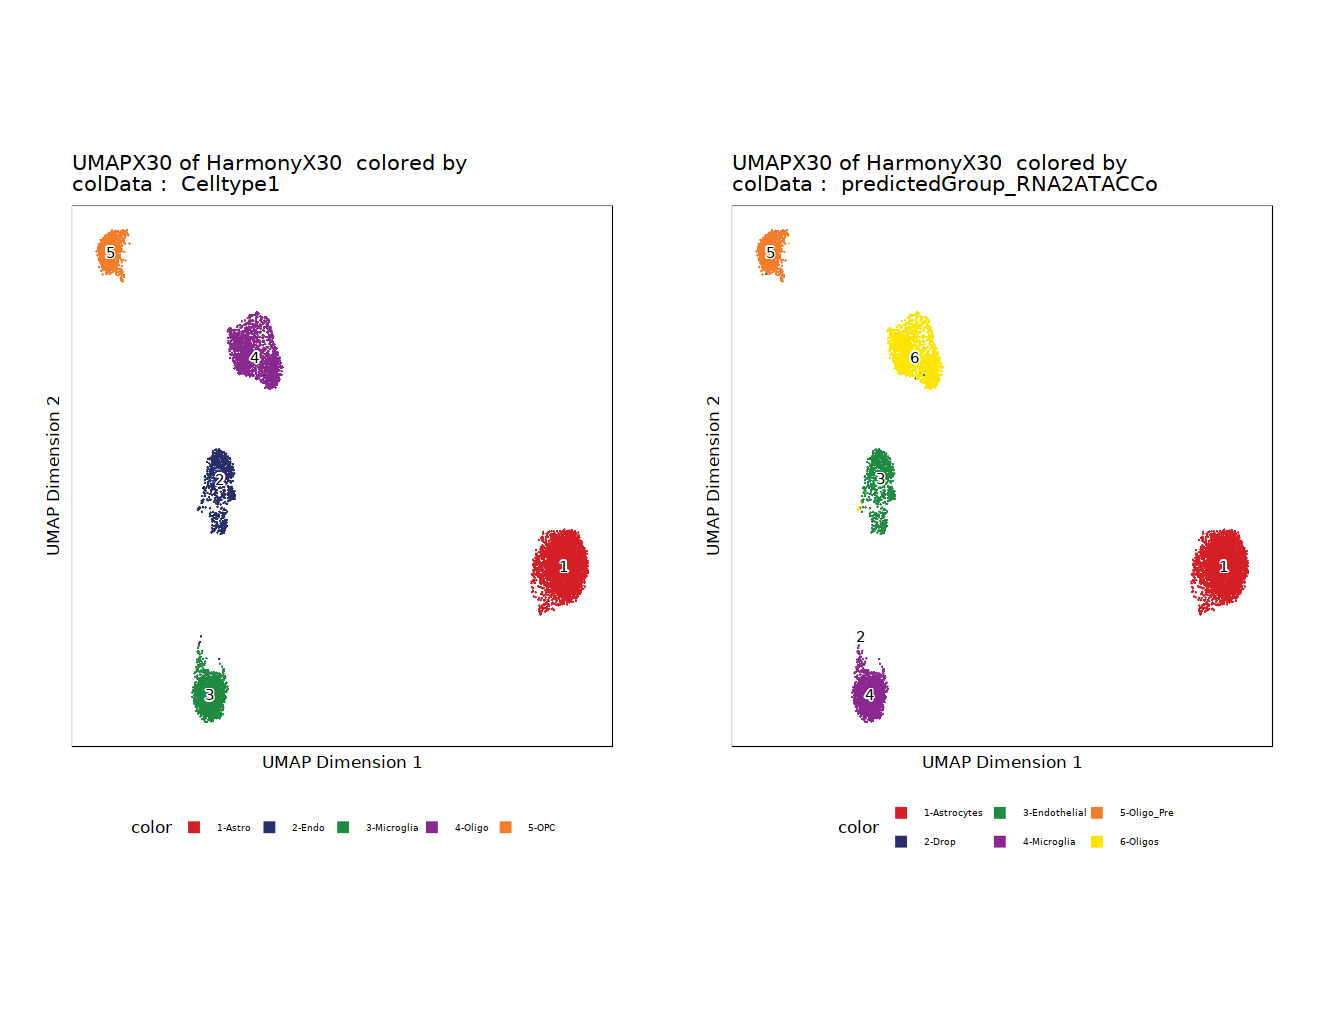

In [10]:
indDrop = which(proj$predictedScore_RNA2ATACCo < 0.5 )
proj$predictedGroup_RNA2ATACCo[indDrop] = 'Drop'

p2 <- plotEmbedding( proj, colorBy = "cellColData", name = "predictedGroup_RNA2ATACCo", embedding = "UMAPX30")
p3 <- plotEmbedding( proj, colorBy = "cellColData", name = "Celltype1", embedding = "UMAPX30")

ggAlignPlots(p3, p2, type = "h")

preClust,
Endothelial,Endo
Astrocytes,Astro
Oligos,Oligo
Microglia,Microglia
Oligo_Pre,OPC


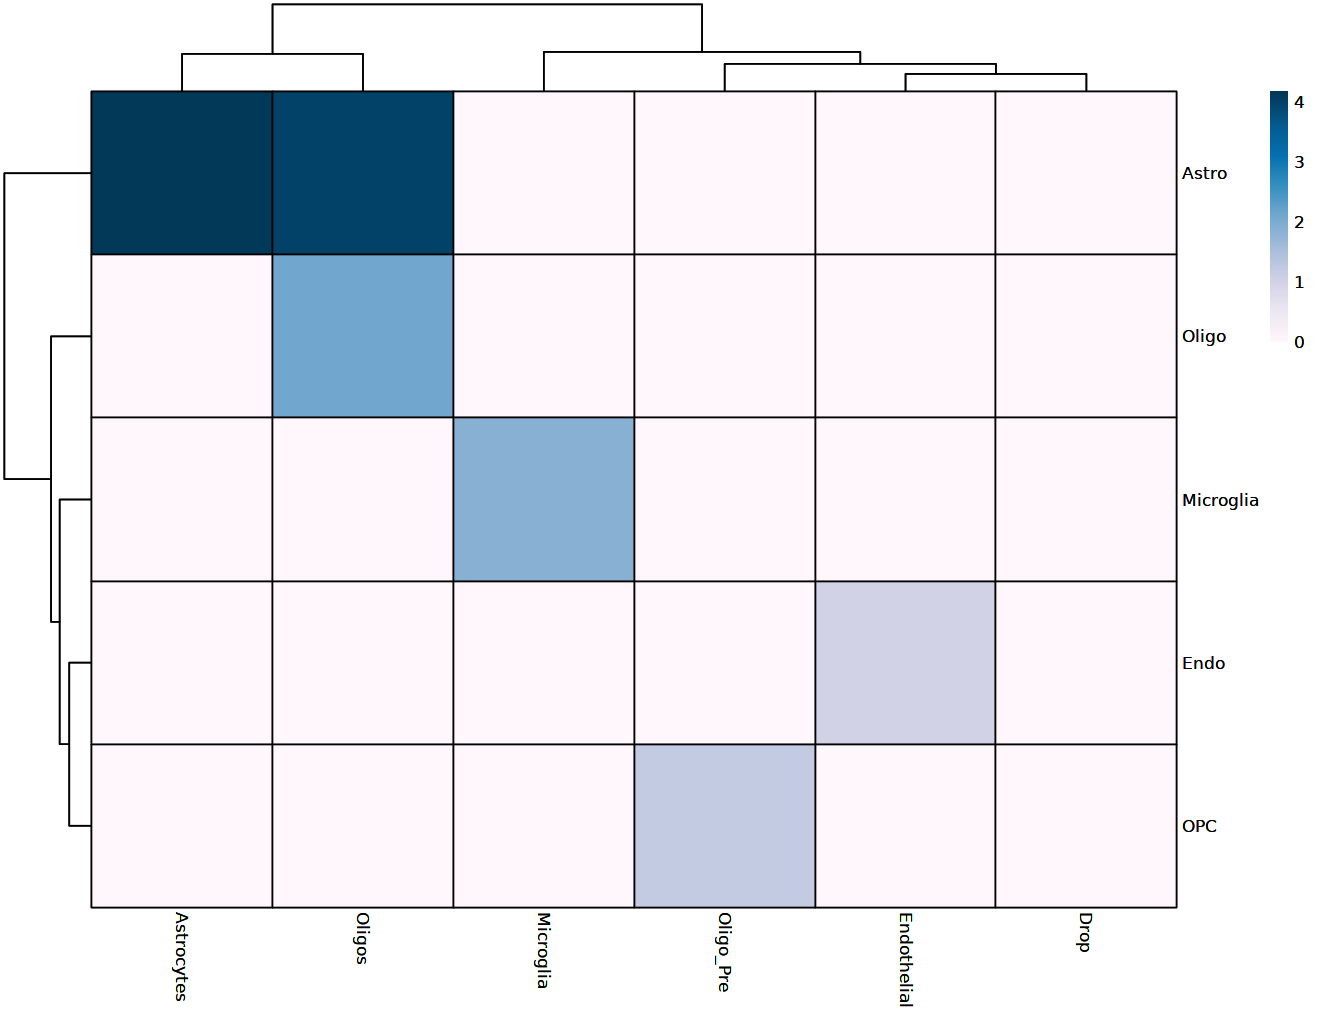

In [11]:
# plot the confusion matrix of cell types by predicted cell type clusters
cM <- confusionMatrix(paste0(proj$Celltype1), paste0(proj$predictedGroup_RNA2ATACCo))
cM <- cM / Matrix::colSums(cM)
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

preClust <- colnames(cM)[apply(cM, 1 , which.max)]
cbind(preClust, rownames(cM)) #Assignments

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-6add4fe3d1b5-Date-2021-09-22_Time-18-16-09.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-09-22 18:16:10 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-6add4fe3d1b5-Date-2021-09-22_Time-18-16-09.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<sc

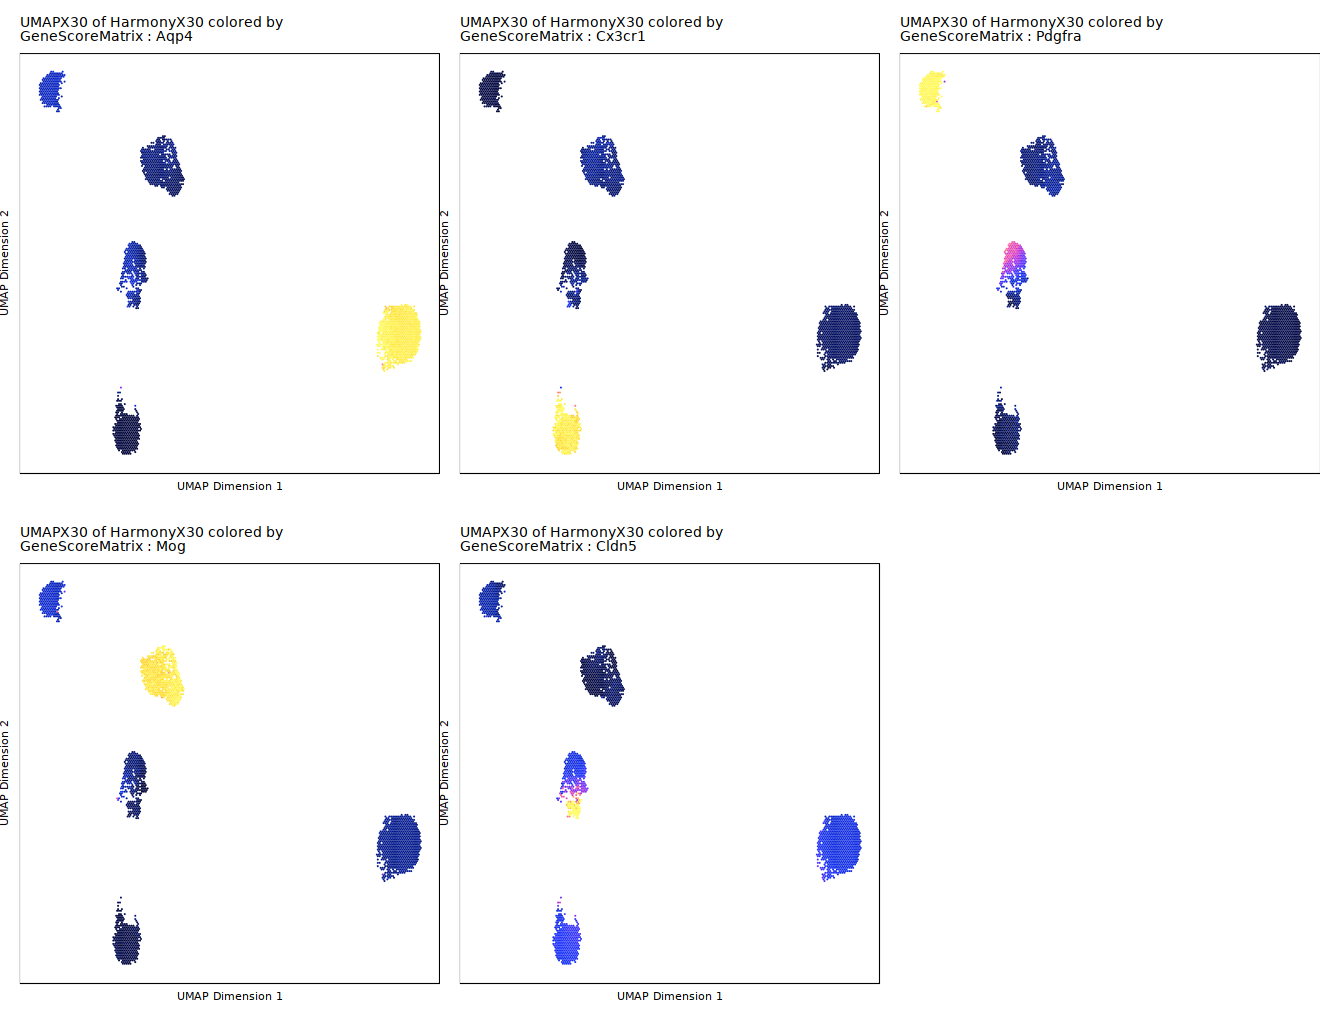

In [12]:
## Neuron vs. Glia markers
markerGenes1  <- c('Aqp4', # Astrocyte
                   'Cx3cr1', # Microglia
                   'Pdgfra', #OPC
                   'Mog', #Oligo
                   'Cldn5') # Endothelial
                  

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPX30")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

In [13]:
proj = saveArchRProject(ArchRProj = proj)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         